# Explore Exercises

In [1]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import env

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split, learning_curve

# Personal Imports
import acquire
import prepare
import explore

In [2]:
df = acquire.wrangle_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   heatingorsystemtypeid         33935 non-null  float64
 2   buildingclasstypeid           0 non-null      object 
 3   architecturalstyletypeid      70 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   propertylandusetypeid         52441 non-null  float64
 6   id                            52441 non-null  int64  
 7   parcelid                      52441 non-null  int64  
 8   logerror                      52441 non-null  float64
 9   transactiondate               52441 non-null  object 
 10  id                            52441 non-null  int64  
 11  parcelid                      52441 non-null  int64  
 12  basementsqft                  47 non-null     float64
 13  b

In [3]:
df.head()

,typeconstructiontypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,id,parcelid,logerror,transactiondate,...,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,typeconstructiondesc
0,NaN,NaN,None,NaN,NaN,261.00,0,14297519,0.03,2017-01-01,...,"11,013.72",None,NaN,"60,590,630,072,012.00",Single Family Residential,None,None,None,None,None
1,NaN,NaN,None,NaN,NaN,261.00,1,17052889,0.06,2017-01-01,...,"5,672.48",None,NaN,"61,110,010,023,006.00",Single Family Residential,None,None,None,None,None
2,NaN,NaN,None,NaN,NaN,261.00,2,14186244,0.01,2017-01-01,...,"6,488.30",None,NaN,"60,590,218,022,012.00",Single Family Residential,None,None,None,None,None
3,NaN,2.00,None,NaN,NaN,261.00,3,12177905,-0.10,2017-01-01,...,"1,777.51",None,NaN,"60,373,001,001,006.00",Single Family Residential,None,None,None,Central,None
4,NaN,2.00,None,NaN,1.00,261.00,6,12095076,-0.00,2017-01-01,...,"9,516.26",None,NaN,"60,374,608,001,014.00",Single Family Residential,Central,None,None,Central,None


In [4]:
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = prepare.prep_zillow(df)

In [5]:
print(df.shape)
print(train.shape)
print(validate.shape)
print(test.shape)

(48267, 34)
(27029, 34)
(11584, 34)
(9654, 34)


In [6]:
train.propertycountylandusecode

3851     0100
37413    0100
1019     1111
20714    0100
52147    0104
         ... 
48758    0101
24068    0100
35448    1111
15738    1111
20163    0100
Name: propertycountylandusecode, Length: 27029, dtype: object

In [7]:
train.head()

,id,parcelid,logerror,transactiondate,id,parcelid,bathrooms,bedrooms,calculatedbathnbr,sq_ft,...,unitcnt,year_built,structuretaxvaluedollarcnt,home_value,assessmentyear,landtaxvaluedollarcnt,censustractandblock,propertylandusedesc,decade_built,county_encoded
3851,5725,12771318,-0.08,2017-01-26,2469290,12771318,2.00,3,2.00,1019,...,1.00,1955,"73,944.00",208797,2016,"134,853.00","60,374,338,013,013.00",Single Family Residential,50s,0
37413,55244,12486082,0.05,2017-07-07,634095,12486082,2.00,3,2.00,1632,...,1.00,1950,"128,091.00",431260,2016,"303,169.00","60,375,711,014,006.00",Single Family Residential,50s,0
1019,1526,17240151,0.02,2017-01-09,2074034,17240151,2.00,3,2.00,1466,...,0.00,1977,"309,000.00",582000,2016,"273,000.00","61,110,084,021,036.00",Single Family Residential,70s,2
20714,30868,12212222,-0.10,2017-04-28,230310,12212222,2.00,4,2.00,1120,...,1.00,2003,"142,642.00",261781,2016,"119,139.00","60,372,400,201,005.00",Single Family Residential,2000s,0
52147,77146,12872167,0.04,2017-09-15,2842513,12872167,2.00,3,2.00,1089,...,1.00,1957,"127,739.00",236131,2016,"108,392.00","60,374,027,032,013.00",Single Family Residential,50s,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27029 entries, 3851 to 20163
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          27029 non-null  int64   
 1   parcelid                    27029 non-null  int64   
 2   logerror                    27029 non-null  float64 
 3   transactiondate             27029 non-null  object  
 4   id                          27029 non-null  int64   
 5   parcelid                    27029 non-null  int64   
 6   bathrooms                   27029 non-null  float64 
 7   bedrooms                    27029 non-null  int64   
 8   calculatedbathnbr           27029 non-null  float64 
 9   sq_ft                       27029 non-null  int64   
 10  finishedsquarefeet12        27029 non-null  float64 
 11  location                    27029 non-null  object  
 12  full_bathrooms              27029 non-null  float64 
 13  garage_spaces

# Main Exploration

In [9]:
# Create separate train sample that removes troublesome variables 
train_explore = train.drop(['id','parcelid','propertylandusedesc','decade_built','location','transactiondate','propertycountylandusecode','propertylandusedesc'], axis=1)

In [10]:
train_explore.head()

,logerror,bathrooms,bedrooms,calculatedbathnbr,sq_ft,finishedsquarefeet12,full_bathrooms,garage_spaces,garagetotalsqft,latitude,...,regionidzip,roomcnt,unitcnt,year_built,structuretaxvaluedollarcnt,home_value,assessmentyear,landtaxvaluedollarcnt,censustractandblock,county_encoded
3851,-0.08,2.00,3,2.00,1019,"1,019.00",2.00,0.00,0.00,"34,041,564.00",...,"96,480.00",0.00,1.00,1955,"73,944.00",208797,2016,"134,853.00","60,374,338,013,013.00",0
37413,0.05,2.00,3,2.00,1632,"1,632.00",2.00,0.00,0.00,"33,846,131.00",...,"96,213.00",0.00,1.00,1950,"128,091.00",431260,2016,"303,169.00","60,375,711,014,006.00",0
1019,0.02,2.00,3,2.00,1466,"1,466.00",2.00,2.00,457.00,"34,286,961.00",...,"97,116.00",6.00,0.00,1977,"309,000.00",582000,2016,"273,000.00","61,110,084,021,036.00",2
20714,-0.10,2.00,4,2.00,1120,"1,120.00",2.00,0.00,0.00,"33,955,012.00",...,"95,984.00",0.00,1.00,2003,"142,642.00",261781,2016,"119,139.00","60,372,400,201,005.00",0
52147,0.04,2.00,3,2.00,1089,"1,089.00",2.00,0.00,0.00,"34,077,651.00",...,"96,507.00",0.00,1.00,1957,"127,739.00",236131,2016,"108,392.00","60,374,027,032,013.00",0


In [11]:
# Drops duplicate id and parcelid vars
train = train.drop(['id','parcelid'], axis=1)

In [12]:
train_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27029 entries, 3851 to 20163
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   logerror                    27029 non-null  float64
 1   bathrooms                   27029 non-null  float64
 2   bedrooms                    27029 non-null  int64  
 3   calculatedbathnbr           27029 non-null  float64
 4   sq_ft                       27029 non-null  int64  
 5   finishedsquarefeet12        27029 non-null  float64
 6   full_bathrooms              27029 non-null  float64
 7   garage_spaces               27029 non-null  float64
 8   garagetotalsqft             27029 non-null  float64
 9   latitude                    27029 non-null  float64
 10  longitude                   27029 non-null  float64
 11  lot_sq_ft                   27029 non-null  float64
 12  poolcnt                     27029 non-null  float64
 13  regionidcity                

In [13]:
train.year_built.head()

3851     1955
37413    1950
1019     1977
20714    2003
52147    1957
Name: year_built, dtype: int64

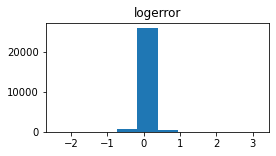

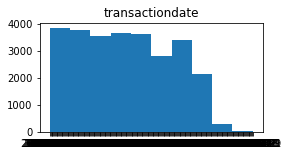

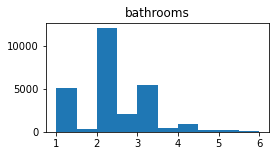

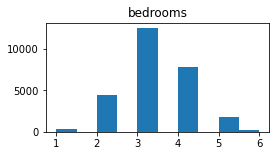

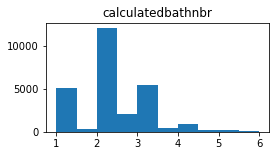

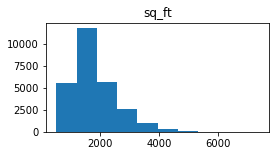

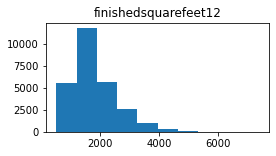

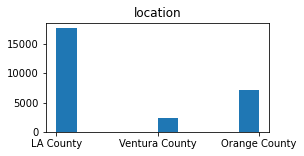

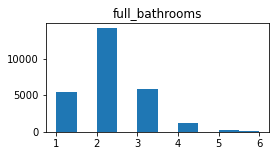

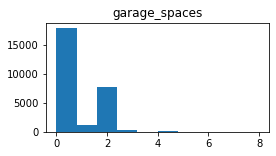

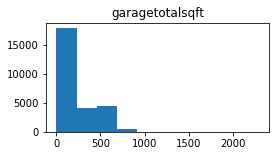

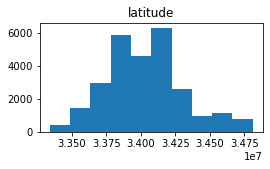

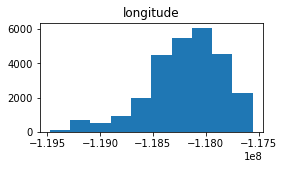

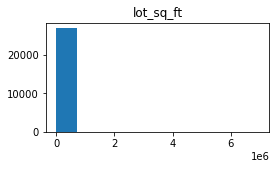

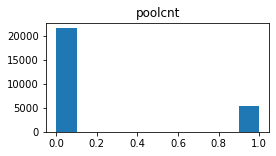

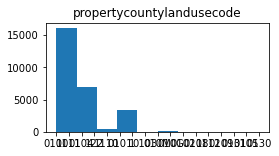

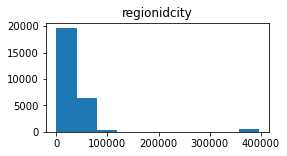

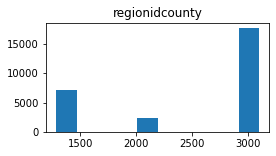

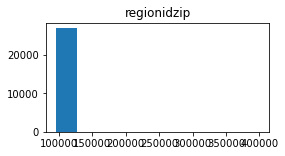

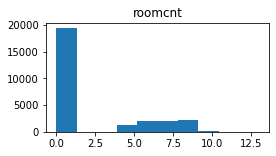

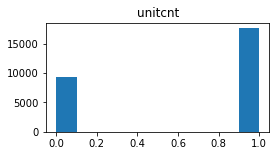

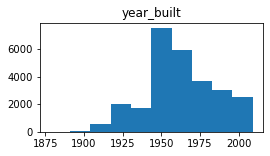

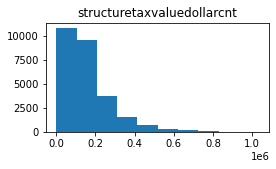

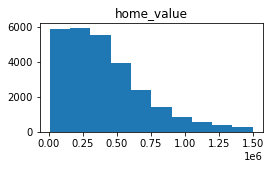

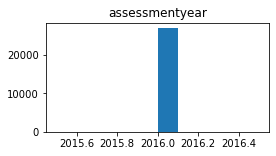

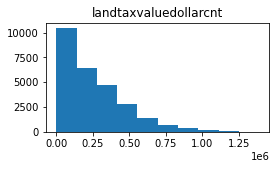

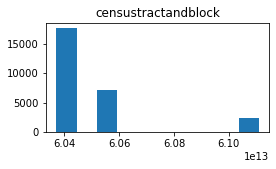

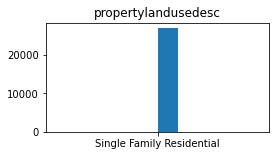

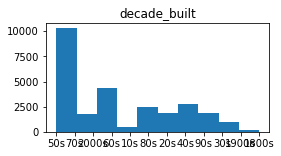

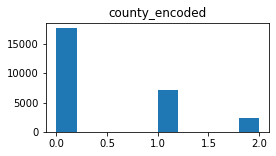

In [14]:
# loop for distribution of all variables, via histogram:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [15]:
train_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27029 entries, 3851 to 20163
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   logerror                    27029 non-null  float64
 1   bathrooms                   27029 non-null  float64
 2   bedrooms                    27029 non-null  int64  
 3   calculatedbathnbr           27029 non-null  float64
 4   sq_ft                       27029 non-null  int64  
 5   finishedsquarefeet12        27029 non-null  float64
 6   full_bathrooms              27029 non-null  float64
 7   garage_spaces               27029 non-null  float64
 8   garagetotalsqft             27029 non-null  float64
 9   latitude                    27029 non-null  float64
 10  longitude                   27029 non-null  float64
 11  lot_sq_ft                   27029 non-null  float64
 12  poolcnt                     27029 non-null  float64
 13  regionidcity                

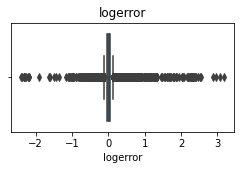

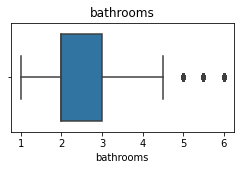

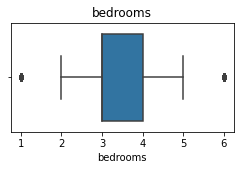

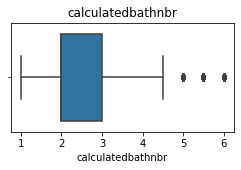

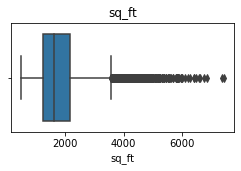

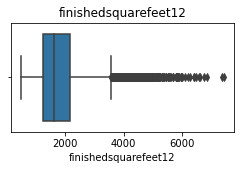

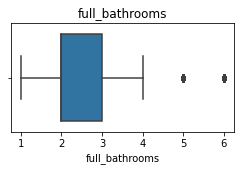

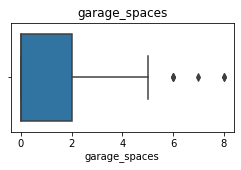

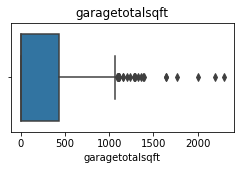

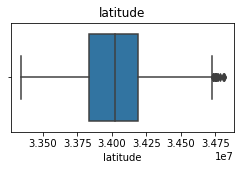

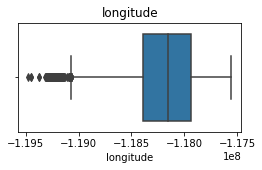

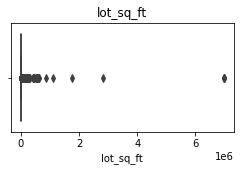

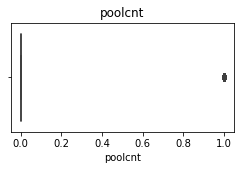

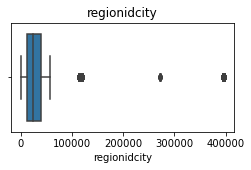

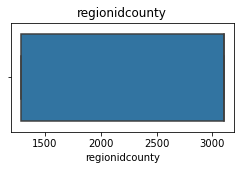

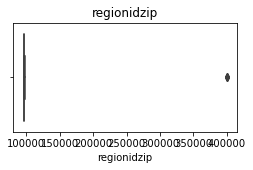

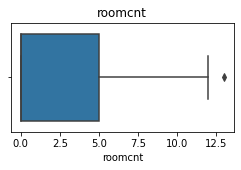

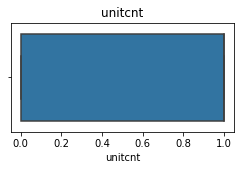

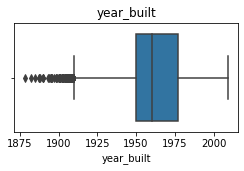

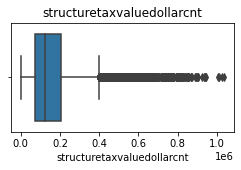

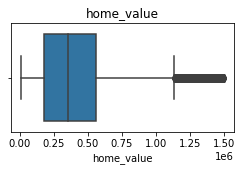

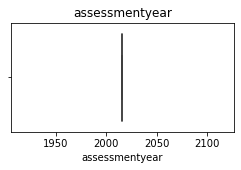

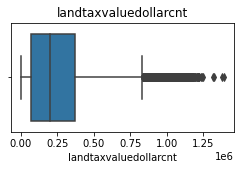

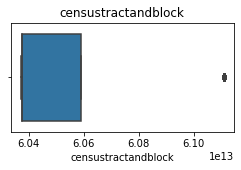

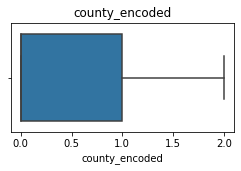

In [16]:
for col in train_explore.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(train_explore[col])
    plt.title(col)
    plt.show()

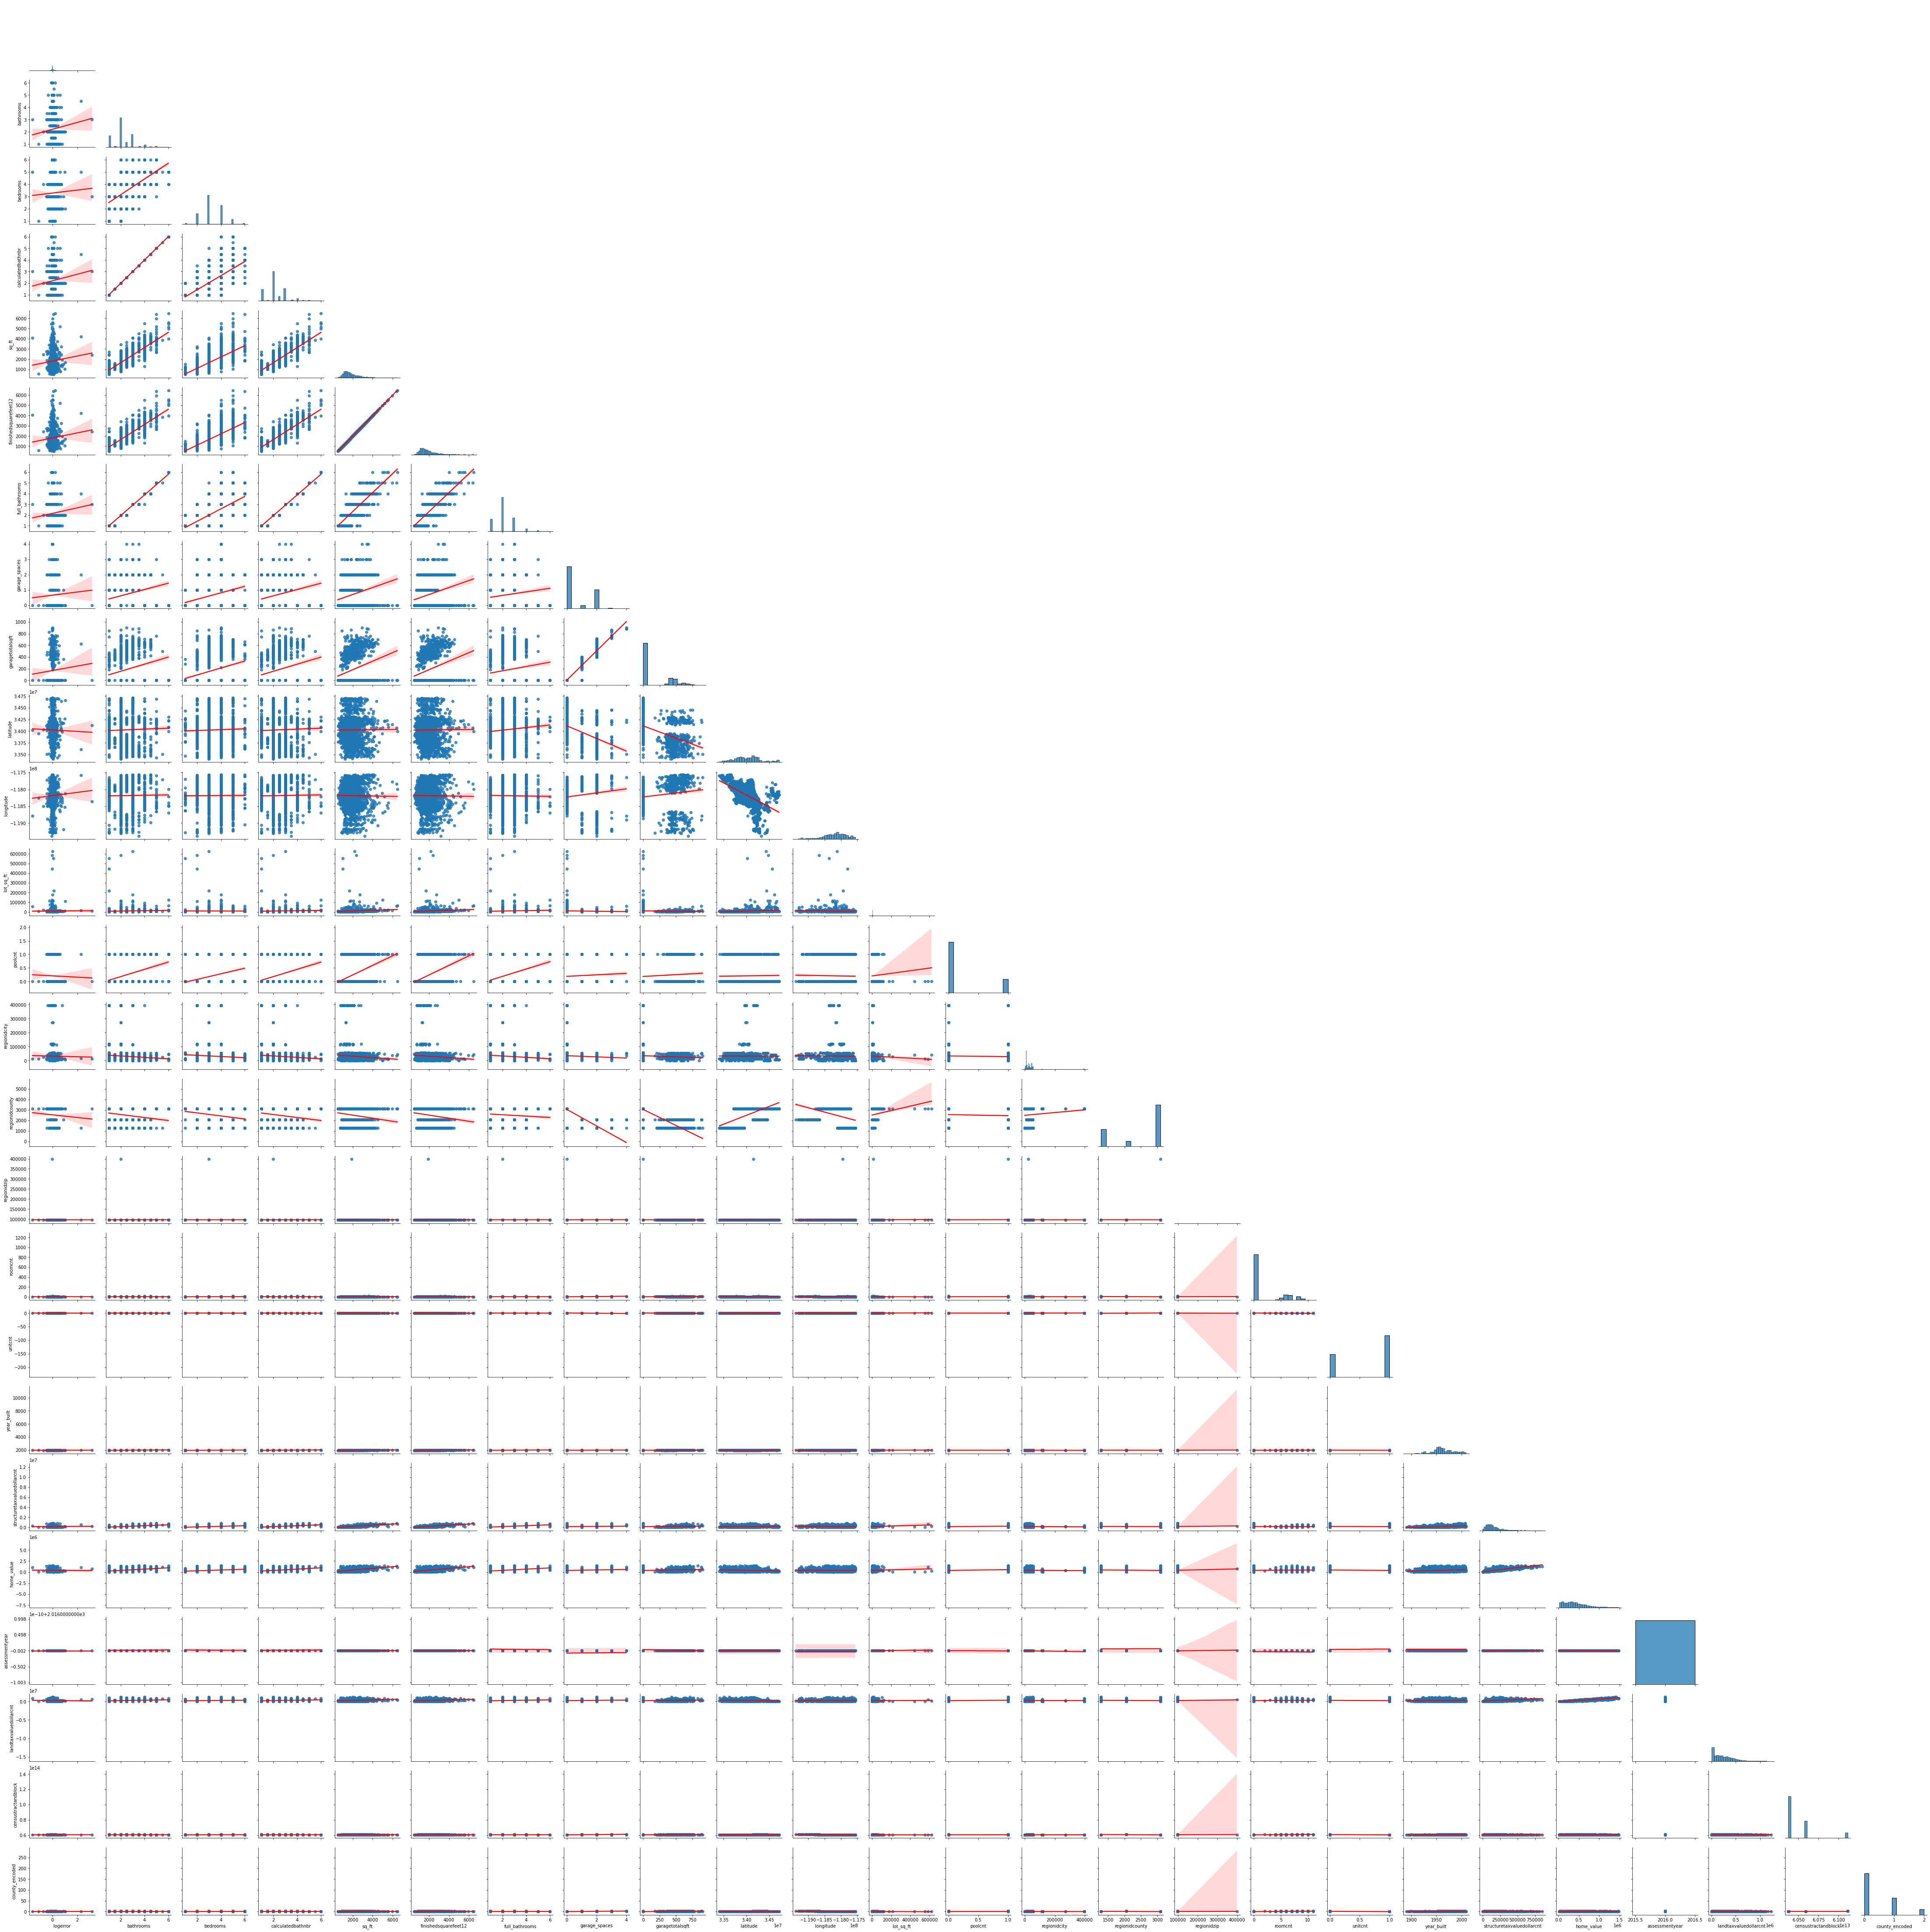

In [17]:
# Creating a snapshot of our data, variables, and their relationships
sns.pairplot(train_explore.sample(2000), kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})

In [18]:
train_explore.year_built.dtype

dtype('int64')

In [19]:
train.location.value_counts()

LA County         17674
Orange County      7083
Ventura County     2272
Name: location, dtype: int64

In [20]:
train.censustractandblock.nunique()

19827

In [21]:
train.censustractandblock.value_counts()

60,379,201,162,006.00    17
60,590,320,571,003.00    14
60,590,320,421,002.00    13
60,590,524,263,000.00    12
60,371,439,011,000.00    12
                         ..
60,375,713,004,006.00     1
60,375,431,005,007.00     1
61,110,020,003,002.00     1
60,590,320,484,001.00     1
60,375,010,023,002.00     1
Name: censustractandblock, Length: 19827, dtype: int64

In [22]:
train.censustractandblock.info()

<class 'pandas.core.series.Series'>
Int64Index: 27029 entries, 3851 to 20163
Series name: censustractandblock
Non-Null Count  Dtype  
--------------  -----  
27029 non-null  float64
dtypes: float64(1)
memory usage: 422.3 KB


### Feature-Engineering

In [23]:
def create_features(df):
    # Create feature for age of a home
    df['age'] = 2017 - df.yearbuilt

    # Bin censustractandblock by county
    df['censustract_bin'] = pd.cut(df.censustractandblock, bins = [0, 60380000000000, 60600000000000, 70000000000000 ], 
                       labels = [0,1,2])

    # [Next feature]


In [24]:
df['censustract_bin'] = pd.cut(df.censustractandblock, bins = [0, 60380000000000, 60600000000000, 70000000000000 ], 
                       labels = [0,1,2])

In [25]:
df['census_county_bin'] = pd.cut(df.censustractandblock, bins = [0, 60380000000000, 60600000000000, 70000000000000 ], 
                       labels = ['LA','Orange','Ventura'])

In [26]:
df['censustract_bin'].value_counts()

0    31568
1    12559
2     4139
Name: censustract_bin, dtype: int64

In [27]:
df['census_county_bin']

0         Orange
1        Ventura
2         Orange
3             LA
4             LA
          ...   
52436         LA
52437         LA
52438    Ventura
52439         LA
52440         LA
Name: census_county_bin, Length: 48267, dtype: category
Categories (3, object): ['LA' < 'Orange' < 'Ventura']

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27029 entries, 3851 to 20163
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27029 non-null  float64 
 1   transactiondate             27029 non-null  object  
 2   bathrooms                   27029 non-null  float64 
 3   bedrooms                    27029 non-null  int64   
 4   calculatedbathnbr           27029 non-null  float64 
 5   sq_ft                       27029 non-null  int64   
 6   finishedsquarefeet12        27029 non-null  float64 
 7   location                    27029 non-null  object  
 8   full_bathrooms              27029 non-null  float64 
 9   garage_spaces               27029 non-null  float64 
 10  garagetotalsqft             27029 non-null  float64 
 11  latitude                    27029 non-null  float64 
 12  longitude                   27029 non-null  float64 
 13  lot_sq_ft    

In [29]:
# Creating a plot loop that iterates through all combinations of variables
def plot_categorical_and_continuous_vars(train, cat_cols, cont_cols):
    train_sample = train.sample(5000)
    for cont in cont_cols:
        for cat in cat_cols:
            print(cat)
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            
            #plt.subplot(231)
            #sns.factorplot(x=cat, y=cont, data=train_sample)

            plt.subplot(131)
            sns.stripplot(x=train_sample[cat].astype(str), y = train_sample[cont])
           

            #plt.subplot(1, 3, 3)
            #sns.boxplot(data = train_sample, x = cont, hue = cat)
            
            
            #plt.subplot(1, 3, 2)
            #sns.barplot(data = train_sample, x = cat, y = cont)

In [30]:
# Define function which plots a categorical and continuous var
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    df_sample = df.sample(2000)
    plt.figure()
    sns.countplot(x=categorical, data=df_sample)
    plt.figure()
    sns.swarmplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.boxplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.violinplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.barplot(x=categorical, y=continuous, data=df_sample)

In [31]:
plot_categorical_and_continuous_vars(train, ['censustractandblock'], ['logerror'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 432x288 with 0 Axes>

In [ ]:
train.censustractandblock.value_counts()

60,379,201,162,006.00    17
60,590,320,571,003.00    14
60,590,320,421,002.00    13
60,590,524,263,000.00    12
60,371,439,011,000.00    12
                         ..
60,375,713,004,006.00     1
60,375,431,005,007.00     1
61,110,020,003,002.00     1
60,590,320,484,001.00     1
60,375,010,023,002.00     1
Name: censustractandblock, Length: 19827, dtype: int64

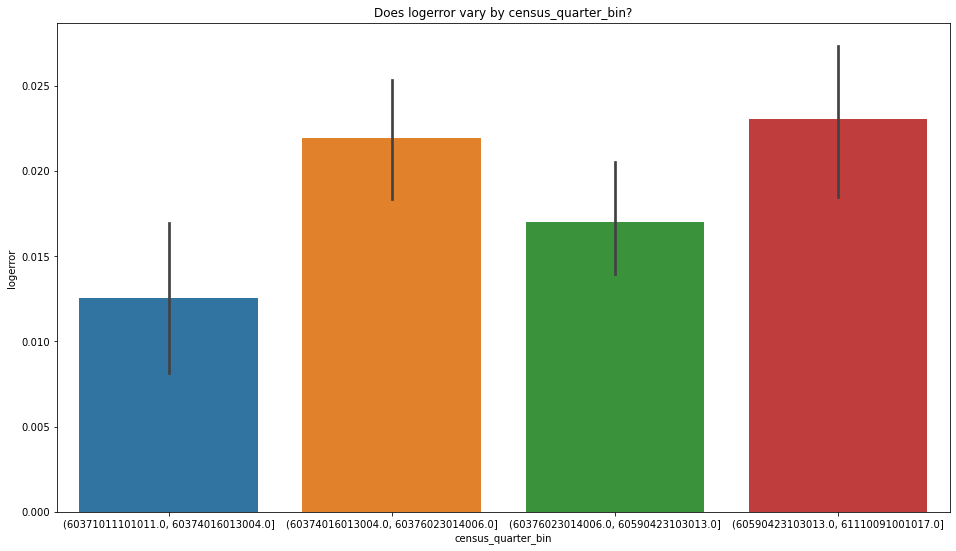

In [39]:
train['census_quarter_bin'] = pd.qcut(train['censustractandblock'],q=4)

plt.figure(figsize=(16, 9))
sns.barplot(data = train, x='census_quarter_bin', y='logerror')
plt.title('Does logerror vary by census_quarter_bin?')
plt.show()

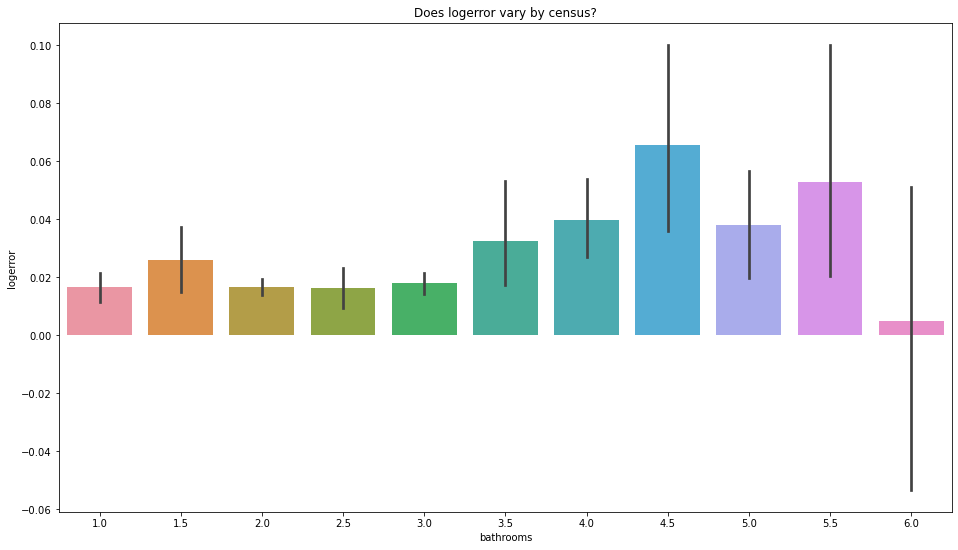

In [41]:
plt.figure(figsize=(16, 9))
sns.barplot(data = train, x='bathrooms', y='logerror')
plt.title('Does logerror vary by census?')
plt.show()

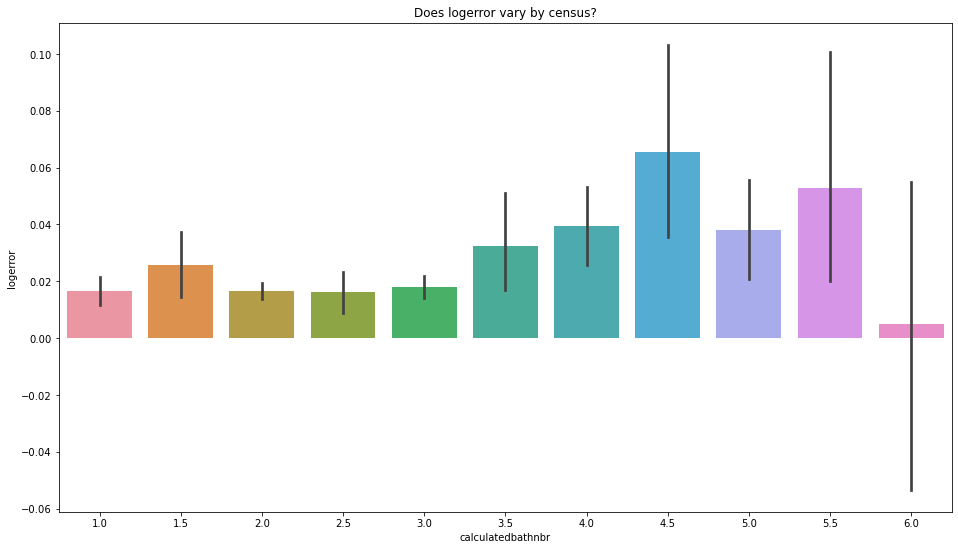

In [42]:
plt.figure(figsize=(16, 9))
sns.barplot(data = train, x='calculatedbathnbr', y='logerror')
plt.title('Does logerror vary by census?')
plt.show()

In [44]:
(train['calculatedbathnbr'] == train['bathrooms']).value_counts()

True    27029
dtype: int64

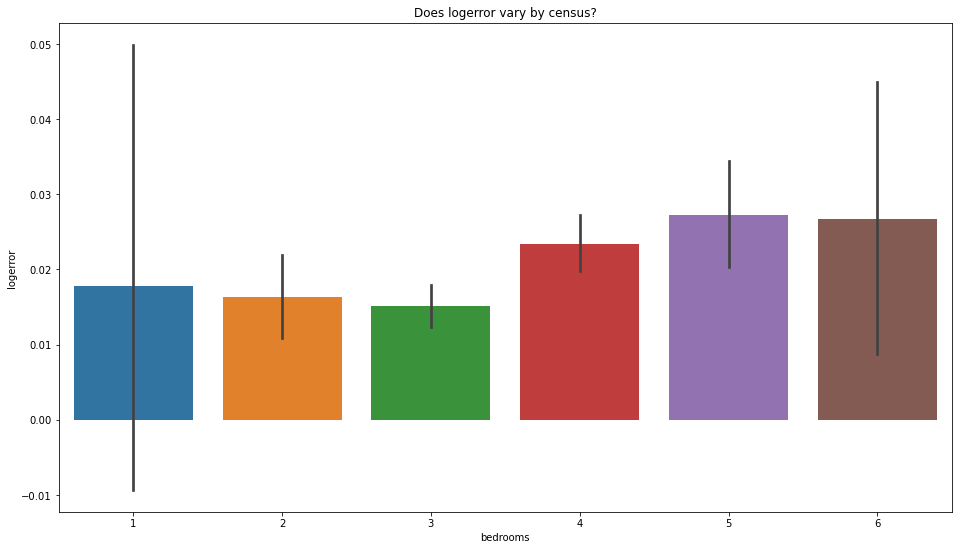

In [45]:
plt.figure(figsize=(16, 9))
sns.barplot(data = train, x='bedrooms', y='logerror')
plt.title('Does logerror vary by census?')
plt.show()

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27029 entries, 3851 to 20163
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27029 non-null  float64 
 1   transactiondate             27029 non-null  object  
 2   bathrooms                   27029 non-null  float64 
 3   bedrooms                    27029 non-null  int64   
 4   calculatedbathnbr           27029 non-null  float64 
 5   sq_ft                       27029 non-null  int64   
 6   finishedsquarefeet12        27029 non-null  float64 
 7   location                    27029 non-null  object  
 8   full_bathrooms              27029 non-null  float64 
 9   garage_spaces               27029 non-null  float64 
 10  garagetotalsqft             27029 non-null  float64 
 11  latitude                    27029 non-null  float64 
 12  longitude                   27029 non-null  float64 
 13  lot_sq_ft    

In [ ]:
train['logerror_bins'] = pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])

In [ ]:
train.logerror_bins.value_counts()

(-0.05, 0.05]    17735
(0.05, 0.2]       4260
(-0.2, -0.05]     3271
(0.2, 4.0]        1227
(-5.0, -0.2]       536
Name: logerror_bins, dtype: int64

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27029 entries, 3851 to 20163
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27029 non-null  float64 
 1   transactiondate             27029 non-null  object  
 2   bathrooms                   27029 non-null  float64 
 3   bedrooms                    27029 non-null  int64   
 4   calculatedbathnbr           27029 non-null  float64 
 5   sq_ft                       27029 non-null  int64   
 6   finishedsquarefeet12        27029 non-null  float64 
 7   location                    27029 non-null  object  
 8   full_bathrooms              27029 non-null  float64 
 9   garage_spaces               27029 non-null  float64 
 10  garagetotalsqft             27029 non-null  float64 
 11  latitude                    27029 non-null  float64 
 12  longitude                   27029 non-null  float64 
 13  lot_sq_ft    

In [35]:
train.head()

,logerror,transactiondate,bathrooms,bedrooms,calculatedbathnbr,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,...,unitcnt,year_built,structuretaxvaluedollarcnt,home_value,assessmentyear,landtaxvaluedollarcnt,censustractandblock,propertylandusedesc,decade_built,county_encoded
3851,-0.08,2017-01-26,2.00,3,2.00,1019,"1,019.00",LA County,2.00,0.00,...,1.00,1955,"73,944.00",208797,2016,"134,853.00","60,374,338,013,013.00",Single Family Residential,50s,0
37413,0.05,2017-07-07,2.00,3,2.00,1632,"1,632.00",LA County,2.00,0.00,...,1.00,1950,"128,091.00",431260,2016,"303,169.00","60,375,711,014,006.00",Single Family Residential,50s,0
1019,0.02,2017-01-09,2.00,3,2.00,1466,"1,466.00",Ventura County,2.00,2.00,...,0.00,1977,"309,000.00",582000,2016,"273,000.00","61,110,084,021,036.00",Single Family Residential,70s,2
20714,-0.10,2017-04-28,2.00,4,2.00,1120,"1,120.00",LA County,2.00,0.00,...,1.00,2003,"142,642.00",261781,2016,"119,139.00","60,372,400,201,005.00",Single Family Residential,2000s,0
52147,0.04,2017-09-15,2.00,3,2.00,1089,"1,089.00",LA County,2.00,0.00,...,1.00,1957,"127,739.00",236131,2016,"108,392.00","60,374,027,032,013.00",Single Family Residential,50s,0


In [ ]:
train.calculatedbathnbr.value_counts()

In [36]:
train['year_built']

3851     1955
37413    1950
1019     1977
20714    2003
52147    1957
         ... 
48758    1958
24068    1988
35448    2003
15738    1979
20163    1949
Name: year_built, Length: 27029, dtype: int64

In [37]:
train['age'] = 2017 - train.year_built

In [38]:
train['age'].value_counts()

62     1045
67      846
64      804
63      803
61      735
       ... 
135       1
123       1
120       1
129       1
118       1
Name: age, Length: 123, dtype: int64

In [ ]:
# potential labels: labels = [0, .066, .133, .20, .266, .333, .40, .466, .533, .60, .666, .733, .8, .866, .933]

train['age_bin'] = pd.cut(train.age, 
                           bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],labels = [0, .066, .133, .20, .266, .333, .40, .466, .533, .60, .666, .733, .8, .866, .933])

In [ ]:
## Exploring Censustractandblock
# Barplot expressing churn rate of customers by payment type: bank transfer, cc, e-check, mailed-check
variables = ['censustract_bin', 'logerror']

mean = [train['censustract_bin'].mean()]

for x in range(0,4):
    sns.barplot('logerror',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

KeyError: 'censustract_bin'

# Initial Questions and Hypotheses

1. does 

# plotly 3d scatter
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.update_layout(width=700, height=500)
# fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()